In [47]:
import pandas as pd
import numpy as np
from binance.client import Client

import seaborn as sns

In [23]:
client = Client()

In [24]:
info = client.get_exchange_info()
info

{'timezone': 'UTC',
 'serverTime': 1642397518927,
 'rateLimits': [{'rateLimitType': 'REQUEST_WEIGHT',
   'interval': 'MINUTE',
   'intervalNum': 1,
   'limit': 1200},
  {'rateLimitType': 'ORDERS',
   'interval': 'SECOND',
   'intervalNum': 10,
   'limit': 50},
  {'rateLimitType': 'ORDERS',
   'interval': 'DAY',
   'intervalNum': 1,
   'limit': 160000},
  {'rateLimitType': 'RAW_REQUESTS',
   'interval': 'MINUTE',
   'intervalNum': 5,
   'limit': 6100}],
 'exchangeFilters': [],
 'symbols': [{'symbol': 'ETHBTC',
   'status': 'TRADING',
   'baseAsset': 'ETH',
   'baseAssetPrecision': 8,
   'quoteAsset': 'BTC',
   'quotePrecision': 8,
   'quoteAssetPrecision': 8,
   'baseCommissionPrecision': 8,
   'quoteCommissionPrecision': 8,
   'orderTypes': ['LIMIT',
    'LIMIT_MAKER',
    'MARKET',
    'STOP_LOSS_LIMIT',
    'TAKE_PROFIT_LIMIT'],
   'icebergAllowed': True,
   'ocoAllowed': True,
   'quoteOrderQtyMarketAllowed': True,
   'isSpotTradingAllowed': True,
   'isMarginTradingAllowed': True,


In [25]:
symbols = [x['symbol'] for x in info['symbols']]
symbols

['ETHBTC',
 'LTCBTC',
 'BNBBTC',
 'NEOBTC',
 'QTUMETH',
 'EOSETH',
 'SNTETH',
 'BNTETH',
 'BCCBTC',
 'GASBTC',
 'BNBETH',
 'BTCUSDT',
 'ETHUSDT',
 'HSRBTC',
 'OAXETH',
 'DNTETH',
 'MCOETH',
 'ICNETH',
 'MCOBTC',
 'WTCBTC',
 'WTCETH',
 'LRCBTC',
 'LRCETH',
 'QTUMBTC',
 'YOYOBTC',
 'OMGBTC',
 'OMGETH',
 'ZRXBTC',
 'ZRXETH',
 'STRATBTC',
 'STRATETH',
 'SNGLSBTC',
 'SNGLSETH',
 'BQXBTC',
 'BQXETH',
 'KNCBTC',
 'KNCETH',
 'FUNBTC',
 'FUNETH',
 'SNMBTC',
 'SNMETH',
 'NEOETH',
 'IOTABTC',
 'IOTAETH',
 'LINKBTC',
 'LINKETH',
 'XVGBTC',
 'XVGETH',
 'SALTBTC',
 'SALTETH',
 'MDABTC',
 'MDAETH',
 'MTLBTC',
 'MTLETH',
 'SUBBTC',
 'SUBETH',
 'EOSBTC',
 'SNTBTC',
 'ETCETH',
 'ETCBTC',
 'MTHBTC',
 'MTHETH',
 'ENGBTC',
 'ENGETH',
 'DNTBTC',
 'ZECBTC',
 'ZECETH',
 'BNTBTC',
 'ASTBTC',
 'ASTETH',
 'DASHBTC',
 'DASHETH',
 'OAXBTC',
 'ICNBTC',
 'BTGBTC',
 'BTGETH',
 'EVXBTC',
 'EVXETH',
 'REQBTC',
 'REQETH',
 'VIBBTC',
 'VIBETH',
 'HSRETH',
 'TRXBTC',
 'TRXETH',
 'POWRBTC',
 'POWRETH',
 'ARKBTC',
 'ARKETH'

In [26]:
relevant = [x for x in symbols if x.endswith('USDT')]
relevant

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'TUSDUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'ONTUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'ICXUSDT',
 'VENUSDT',
 'NULSUSDT',
 'VETUSDT',
 'PAXUSDT',
 'BCHABCUSDT',
 'BCHSVUSDT',
 'USDCUSDT',
 'LINKUSDT',
 'WAVESUSDT',
 'BTTUSDT',
 'USDSUSDT',
 'ONGUSDT',
 'HOTUSDT',
 'ZILUSDT',
 'ZRXUSDT',
 'FETUSDT',
 'BATUSDT',
 'XMRUSDT',
 'ZECUSDT',
 'IOSTUSDT',
 'CELRUSDT',
 'DASHUSDT',
 'NANOUSDT',
 'OMGUSDT',
 'THETAUSDT',
 'ENJUSDT',
 'MITHUSDT',
 'MATICUSDT',
 'ATOMUSDT',
 'TFUELUSDT',
 'ONEUSDT',
 'FTMUSDT',
 'ALGOUSDT',
 'USDSBUSDT',
 'GTOUSDT',
 'ERDUSDT',
 'DOGEUSDT',
 'DUSKUSDT',
 'ANKRUSDT',
 'WINUSDT',
 'COSUSDT',
 'NPXSUSDT',
 'COCOSUSDT',
 'MTLUSDT',
 'TOMOUSDT',
 'PERLUSDT',
 'DENTUSDT',
 'MFTUSDT',
 'KEYUSDT',
 'STORMUSDT',
 'DOCKUSDT',
 'WANUSDT',
 'FUNUSDT',
 'CVCUSDT',
 'CHZUSDT',
 'BANDUSDT',
 'BUSDUSDT',
 'BEAMUSDT',
 'XTZUSDT',
 'RENUSDT',
 'RVNUSDT',
 'HCUSDT',
 'HBARUSD

In [31]:
#Getting daily price data for past 1 year
def getdailydata(symbol):
    frame = pd.DataFrame(client.get_historical_klines(symbol, '1d', '365 days ago UTC'))
    
    if len(frame) > 0:
        frame = frame.iloc[:, :5]
        frame.columns = ['Time', 'Open', 'High', 'Low', 'Close']
        frame = frame.set_index('Time')
        frame.index = pd.to_datetime(frame.index, unit = 'ms')
        frame = frame.astype(float)
        return frame

In [32]:
getdailydata('BTCUSDT')

,Open,High,Low,Close
Time,,,,
2021-01-18,35824.99,37469.83,34800.00,36631.27
2021-01-19,36622.46,37850.00,35844.06,35891.49
2021-01-20,35901.94,36415.31,33400.00,35468.23
2021-01-21,35468.23,35600.00,30071.00,30850.13
2021-01-22,30851.99,33826.53,28850.00,32945.17
...,...,...,...,...
2022-01-13,43902.65,44500.00,42311.22,42560.11
2022-01-14,42558.35,43448.78,41725.95,43059.96
2022-01-15,43059.96,43800.00,42555.00,43084.29


In [33]:
dfs = []

for coin in relevant:
    dfs.append(getdailydata(coin))

In [38]:
merged_df = pd.concat(dict(zip(relevant, dfs)), axis = 1)

In [39]:
merged_df

BTCUSDT                                ETHUSDT                    \
                Open      High       Low     Close     Open     High      Low   
Time                                                                            
2021-01-18  35824.99  37469.83  34800.00  36631.27  1232.50  1260.75  1182.58   
2021-01-19  36622.46  37850.00  35844.06  35891.49  1258.52  1438.30  1251.49   
2021-01-20  35901.94  36415.31  33400.00  35468.23  1365.36  1407.93  1235.42   
2021-01-21  35468.23  35600.00  30071.00  30850.13  1376.72  1390.00  1086.00   
2021-01-22  30851.99  33826.53  28850.00  32945.17  1111.98  1273.79  1042.31   
...              ...       ...       ...       ...      ...      ...      ...   
2022-01-13  43902.65  44500.00  42311.22  42560.11  3371.60  3410.00  3233.43   
2022-01-14  42558.35  43448.78  41725.95  43059.96  3240.61  3342.79  3188.00   
2022-01-15  43059.96  43800.00  42555.00  43084.29  3307.42  3371.64  3261.00   
2022-01-16  43084.29  43475.00  42581.79  43071.66  3326.51  3393.60  3269.62   
2022-01-17  43071.66  43176.18  42300.00  42581.09  3346.89  3357.57  3237.16   

                      BNBUSDT            ...  ACHUSDT          IMXUSDT         \
              Close      Open      High  ...      Low    Close    Open   High   
Time                                     ...                                    
2021-01-18  1258.45   45.8645   46.8888  ...      NaN      NaN     NaN    NaN   
2021-01-19  1365.36   45.3592   47.2187  ...      NaN      NaN     NaN    NaN   
2021-01-20  1376.99   42.5241   43.0992  ...      NaN      NaN     NaN    NaN   
2021-01-21  1110.96   42.6056   42.7176  ...      NaN      NaN     NaN    NaN   
2021-01-22  1232.62   38.6596   41.5280  ...      NaN      NaN     NaN    NaN   
...             ...       ...       ...  ...      ...      ...     ...    ...   
2022-01-13  3240.61  487.8000  489.8000  ...  0.05704  0.05779   3.717  3.782   
2022-01-14  3307.42  475.1000  492.3000  ...  0.05651  0.05947   3.519  3.642   
2022-01-15  3326.04  489.9000  500.9000  ...  0.05699  0.05796   3.560  3.690   
2022-01-16  3346.88  494.5000  506.0000  ...  0.05686  0.05751   3.617  4.679   
2022-01-17  3253.98  498.6000  499.1000  ...  0.05577  0.05629   4.156  4.299   

                         GLMRUSDT                             
              Low  Close     Open     High      Low    Close  
Time                                                          
2021-01-18    NaN    NaN      NaN      NaN      NaN      NaN  
2021-01-19    NaN    NaN      NaN      NaN      NaN      NaN  
2021-01-20    NaN    NaN      NaN      NaN      NaN      NaN  
2021-01-21    NaN    NaN      NaN      NaN      NaN      NaN  
2021-01-22    NaN    NaN      NaN      NaN      NaN      NaN  
...           ...    ...      ...      ...      ...      ...  
2022-01-13  3.500  3.505   8.9507  14.5900   8.5300  11.5740  
2022-01-14  3.479  3.562  11.5701  15.9700  11.2433  13.3751  
2022-01-15  3.530  3.621  13.3673  14.2790  12.3855  12.6221  
2022-01-16  3.613  4.158  12.6303  12.8278  10.3788  10.3916  
2022-01-17  3.896  3.990  10.3924  10.7742   9.7000   9.7778  

[365 rows x 1424 columns]

In [41]:
#Only get 'Close' column from each 
close_df = merged_df.loc[:,merged_df.columns.get_level_values(1).isin(['Close'])]
close_df

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT
,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close,...,Close,Close,Close,Close,Close,Close,Close,Close,Close,Close
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-18,36631.27,1258.45,45.3412,27.055,151.96,3.301,0.37123,0.28528,2.8144,0.9996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19,35891.49,1365.36,42.5241,26.273,151.86,3.161,0.36720,0.29396,2.7895,0.9996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-20,35468.23,1376.99,42.6069,26.072,149.69,3.238,0.37532,0.29539,2.7756,0.9994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-21,30850.13,1110.96,38.6343,22.096,129.72,2.736,0.30785,0.26802,2.5451,1.0006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-22,32945.17,1232.62,40.8936,23.469,137.66,2.918,0.34867,0.27217,2.6208,0.9991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,42560.11,3240.61,475.2000,23.530,136.70,7.576,1.23300,0.76800,2.7890,0.9996,...,9.47,44.15,0.0793,0.02019,0.01446,1.0004,1.502,0.05779,3.505,11.5740
2022-01-14,43059.96,3307.42,490.0000,24.860,144.70,7.825,1.29200,0.77320,2.8630,0.9997,...,8.73,44.73,0.0790,0.02050,0.01432,1.0005,1.486,0.05947,3.562,13.3751


In [44]:
#Dropping close header
close_df.columns = close_df.columns.droplevel(1)
close_df

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-18,36631.27,1258.45,45.3412,27.055,151.96,3.301,0.37123,0.28528,2.8144,0.9996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19,35891.49,1365.36,42.5241,26.273,151.86,3.161,0.36720,0.29396,2.7895,0.9996,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-20,35468.23,1376.99,42.6069,26.072,149.69,3.238,0.37532,0.29539,2.7756,0.9994,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-21,30850.13,1110.96,38.6343,22.096,129.72,2.736,0.30785,0.26802,2.5451,1.0006,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-22,32945.17,1232.62,40.8936,23.469,137.66,2.918,0.34867,0.27217,2.6208,0.9991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,42560.11,3240.61,475.2000,23.530,136.70,7.576,1.23300,0.76800,2.7890,0.9996,...,9.47,44.15,0.0793,0.02019,0.01446,1.0004,1.502,0.05779,3.505,11.5740
2022-01-14,43059.96,3307.42,490.0000,24.860,144.70,7.825,1.29200,0.77320,2.8630,0.9997,...,8.73,44.73,0.0790,0.02050,0.01432,1.0005,1.486,0.05947,3.562,13.3751
2022-01-15,43084.29,3326.04,494.5000,25.320,147.70,8.243,1.29100,0.77910,2.9090,0.9997,...,8.73,45.57,0.0756,0.02068,0.01440,1.0010,1.547,0.05796,3.621,12.6221


In [45]:
logret_df = np.log(close_df.pct_change())
logret_df

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT
Time,,,,,,,,,,,,,,,,,,,,,
2021-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-19,NaN,-2.465649,NaN,NaN,NaN,NaN,NaN,-3.492450,NaN,-inf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-20,NaN,-4.765585,-6.241398,NaN,NaN,-3.714838,-3.811577,-5.325769,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-6.724834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-22,-2.689568,-2.211750,-2.839085,-2.778398,-2.793465,-2.710246,-2.020440,-4.167953,-3.515147,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.93989,NaN,NaN,NaN,NaN,-inf,NaN,NaN,NaN,-1.227348
2022-01-14,-4.444365,-3.881664,-3.469109,-2.873097,-2.838347,-3.415288,-3.039668,-4.995131,-3.629373,-9.209940,...,NaN,-4.332320,NaN,-4.176370,NaN,-9.210740,NaN,-3.538022,-4.118895,-1.860364
2022-01-15,-7.478639,-5.179687,-4.690328,-3.989789,-3.876050,-2.929598,NaN,-4.875585,-4.130984,-inf,...,-inf,-3.974998,NaN,-4.735223,-5.187386,-7.601402,-3.192969,NaN,-4.100540,NaN


In [52]:
#Correlation
corr = logret_df.corr()
corr

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT
BTCUSDT,1.000000,0.377352,0.304715,0.410833,0.460203,0.251438,0.224349,0.195385,0.310629,0.038203,...,0.818632,0.436039,0.731275,-0.003244,0.936799,-0.626393,0.488350,NaN,0.653801,NaN
ETHUSDT,0.377352,1.000000,0.363436,0.209638,0.446928,0.209365,0.183809,0.112403,0.307768,0.185833,...,-0.579263,0.360235,0.313580,-0.353960,0.295339,-0.446836,0.824699,NaN,-0.255917,NaN
BNBUSDT,0.304715,0.363436,1.000000,0.428466,0.410885,0.254046,0.422233,0.390292,0.351447,0.071119,...,-0.250423,0.393784,-0.402568,-0.578984,0.373265,-0.441690,0.656464,NaN,-0.358868,NaN
NEOUSDT,0.410833,0.209638,0.428466,1.000000,0.308751,0.531235,0.328891,0.392882,0.465775,0.060727,...,0.263363,-0.328521,0.167695,-0.571006,-0.259691,-0.696741,0.427287,NaN,0.181435,NaN
LTCUSDT,0.460203,0.446928,0.410885,0.308751,1.000000,0.186956,0.187411,0.406627,0.442780,0.005484,...,-0.123132,-0.118744,0.830333,-0.351437,-0.290514,-0.356260,-0.312604,NaN,0.653916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USTUSDT,-0.626393,-0.446836,-0.441690,-0.696741,-0.356260,-0.084830,-0.559612,-0.113923,-0.730807,-0.326275,...,0.516530,-0.079315,-1.000000,0.137445,-0.699683,1.000000,-0.025279,NaN,-0.482063,NaN
JOEUSDT,0.488350,0.824699,0.656464,0.427287,-0.312604,-0.804411,-0.627622,0.235292,-0.132953,-1.000000,...,-1.000000,-0.202589,1.000000,-0.588239,-0.329384,-0.025279,1.000000,NaN,-0.591007,NaN
ACHUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMXUSDT,0.653801,-0.255917,-0.358868,0.181435,0.653916,0.559267,0.660978,0.999088,0.844155,-1.000000,...,NaN,0.993781,-1.000000,0.927872,0.808931,-0.482063,-0.591007,NaN,1.000000,NaN


<AxesSubplot:>

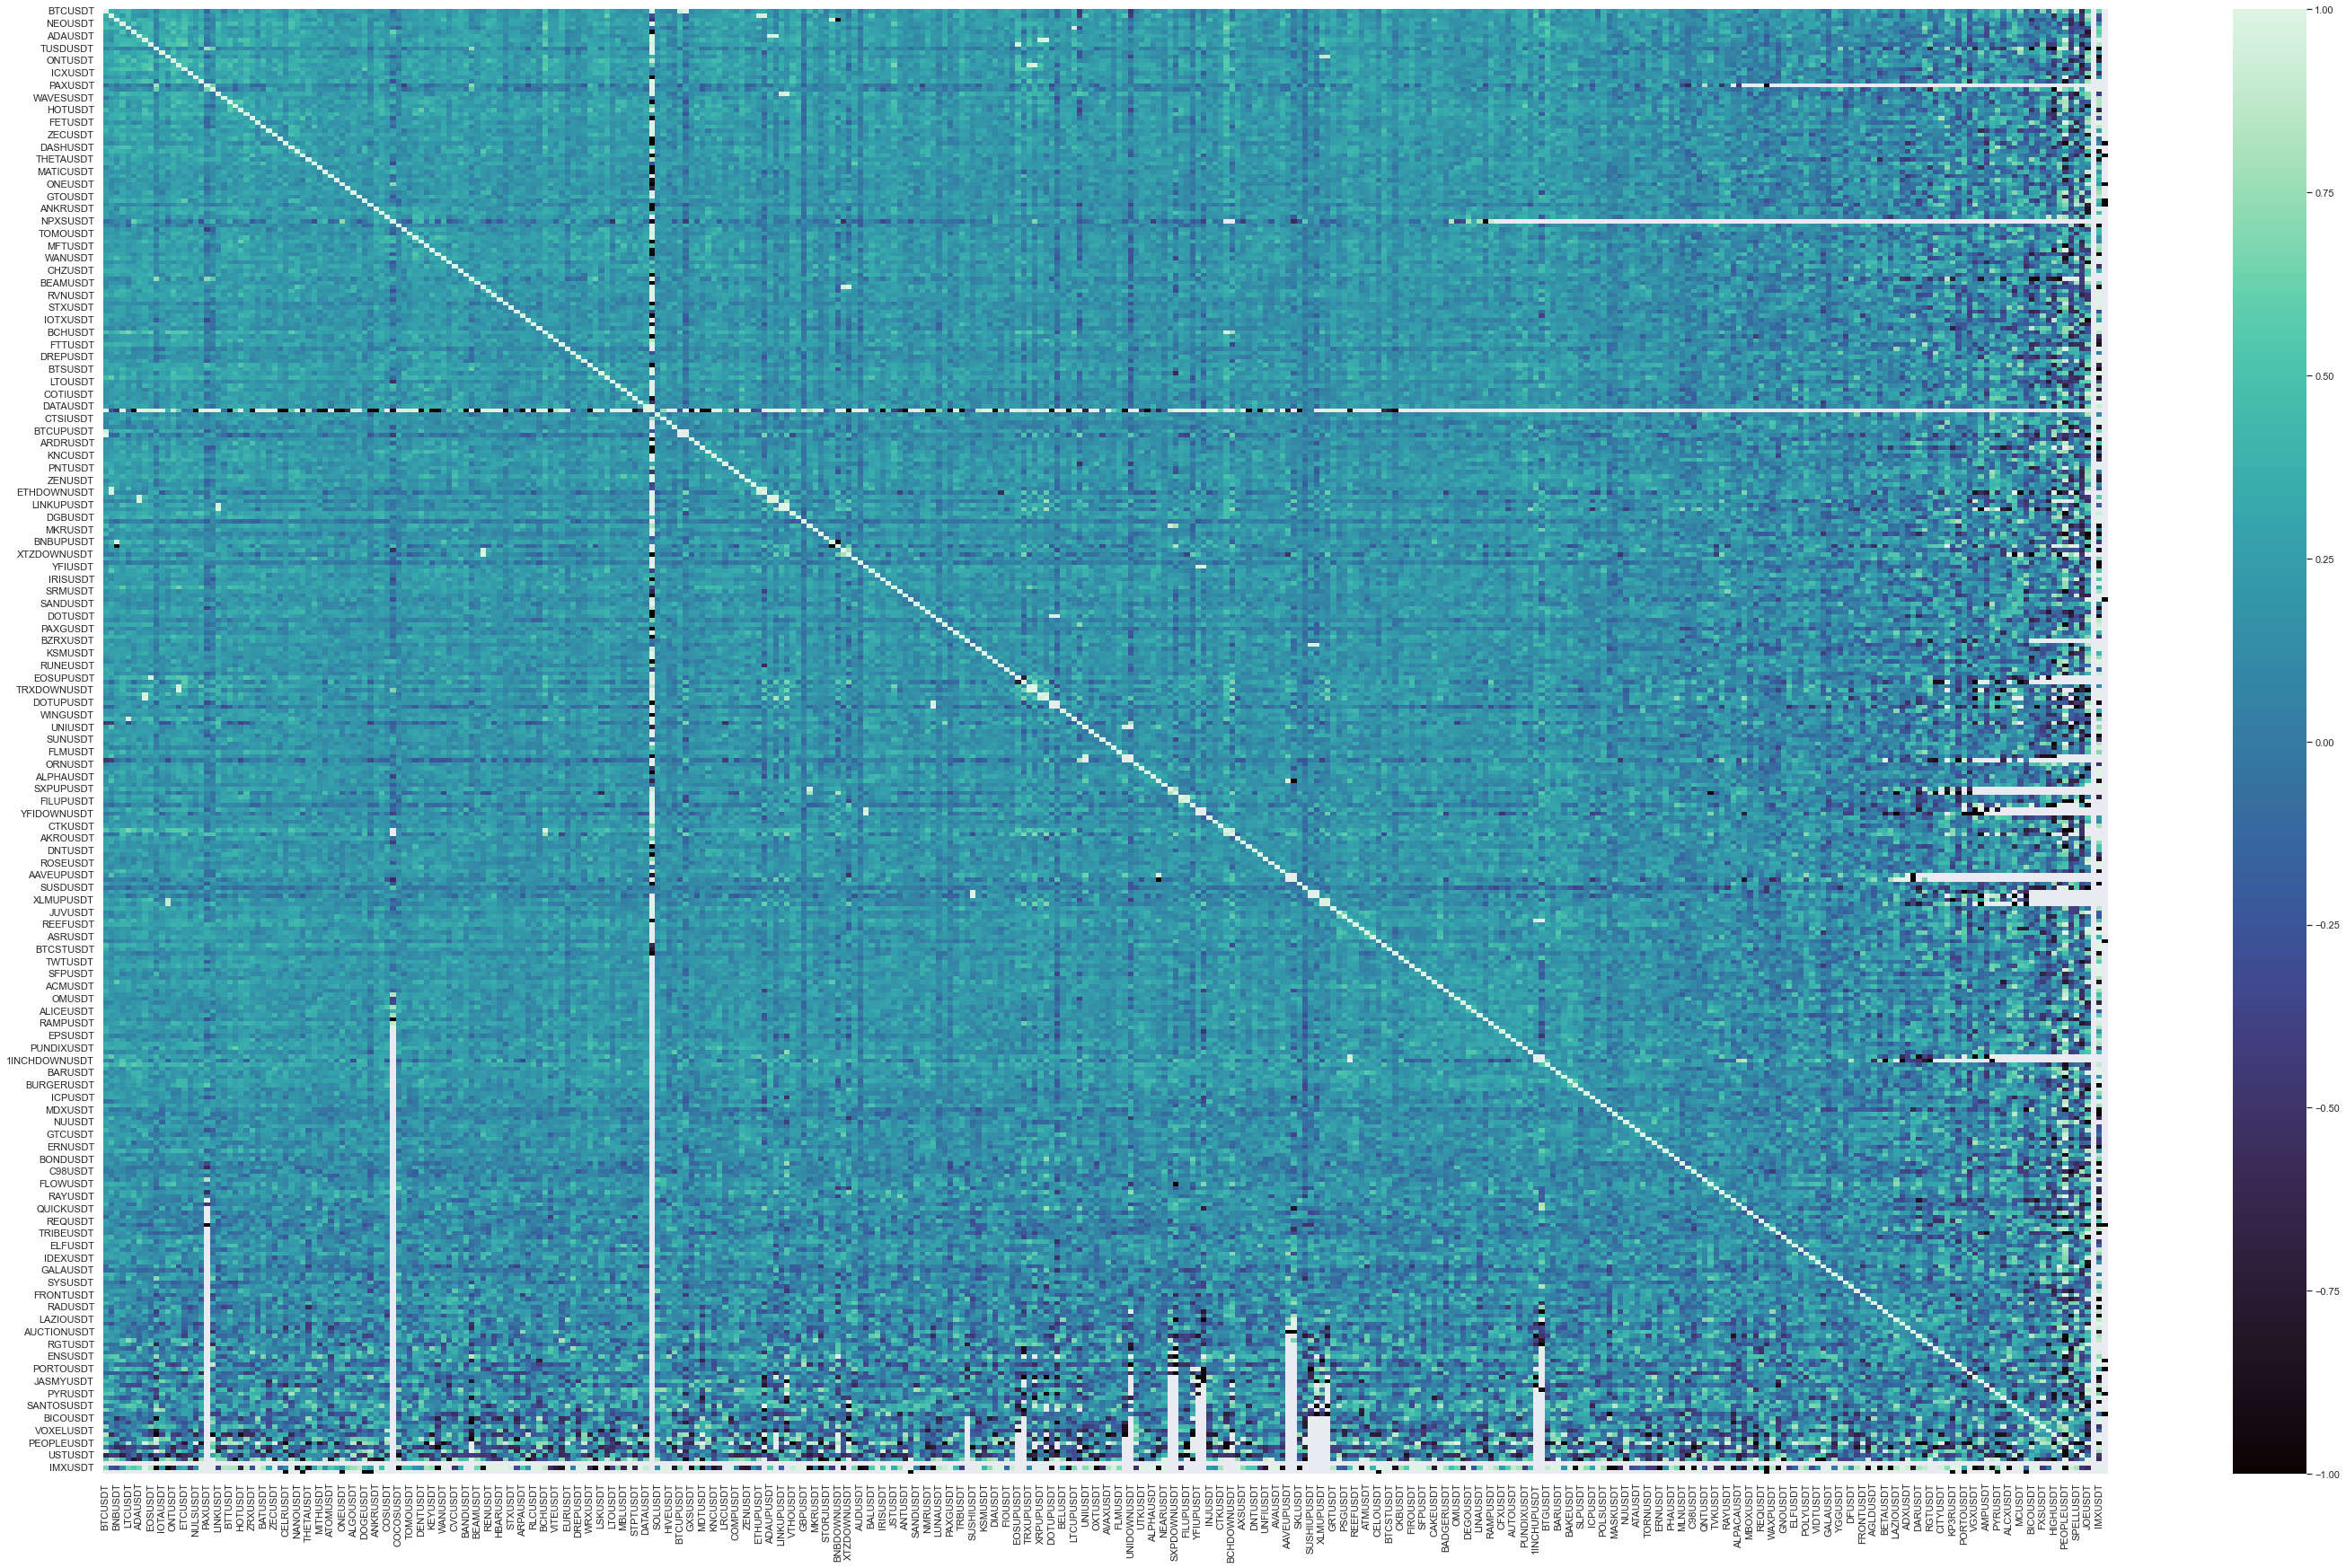

In [53]:
sns.set(rc = {'figure.figsize': (50, 30)})
sns.heatmap(corr, cmap = 'mako')

In [55]:
corr1 = logret_df[['BTCUSDT', 'ETHUSDT', 'ADAUSDT', 'SOLUSDT', 'XRPUSDT','MANAUSDT']].corr()

<AxesSubplot:>

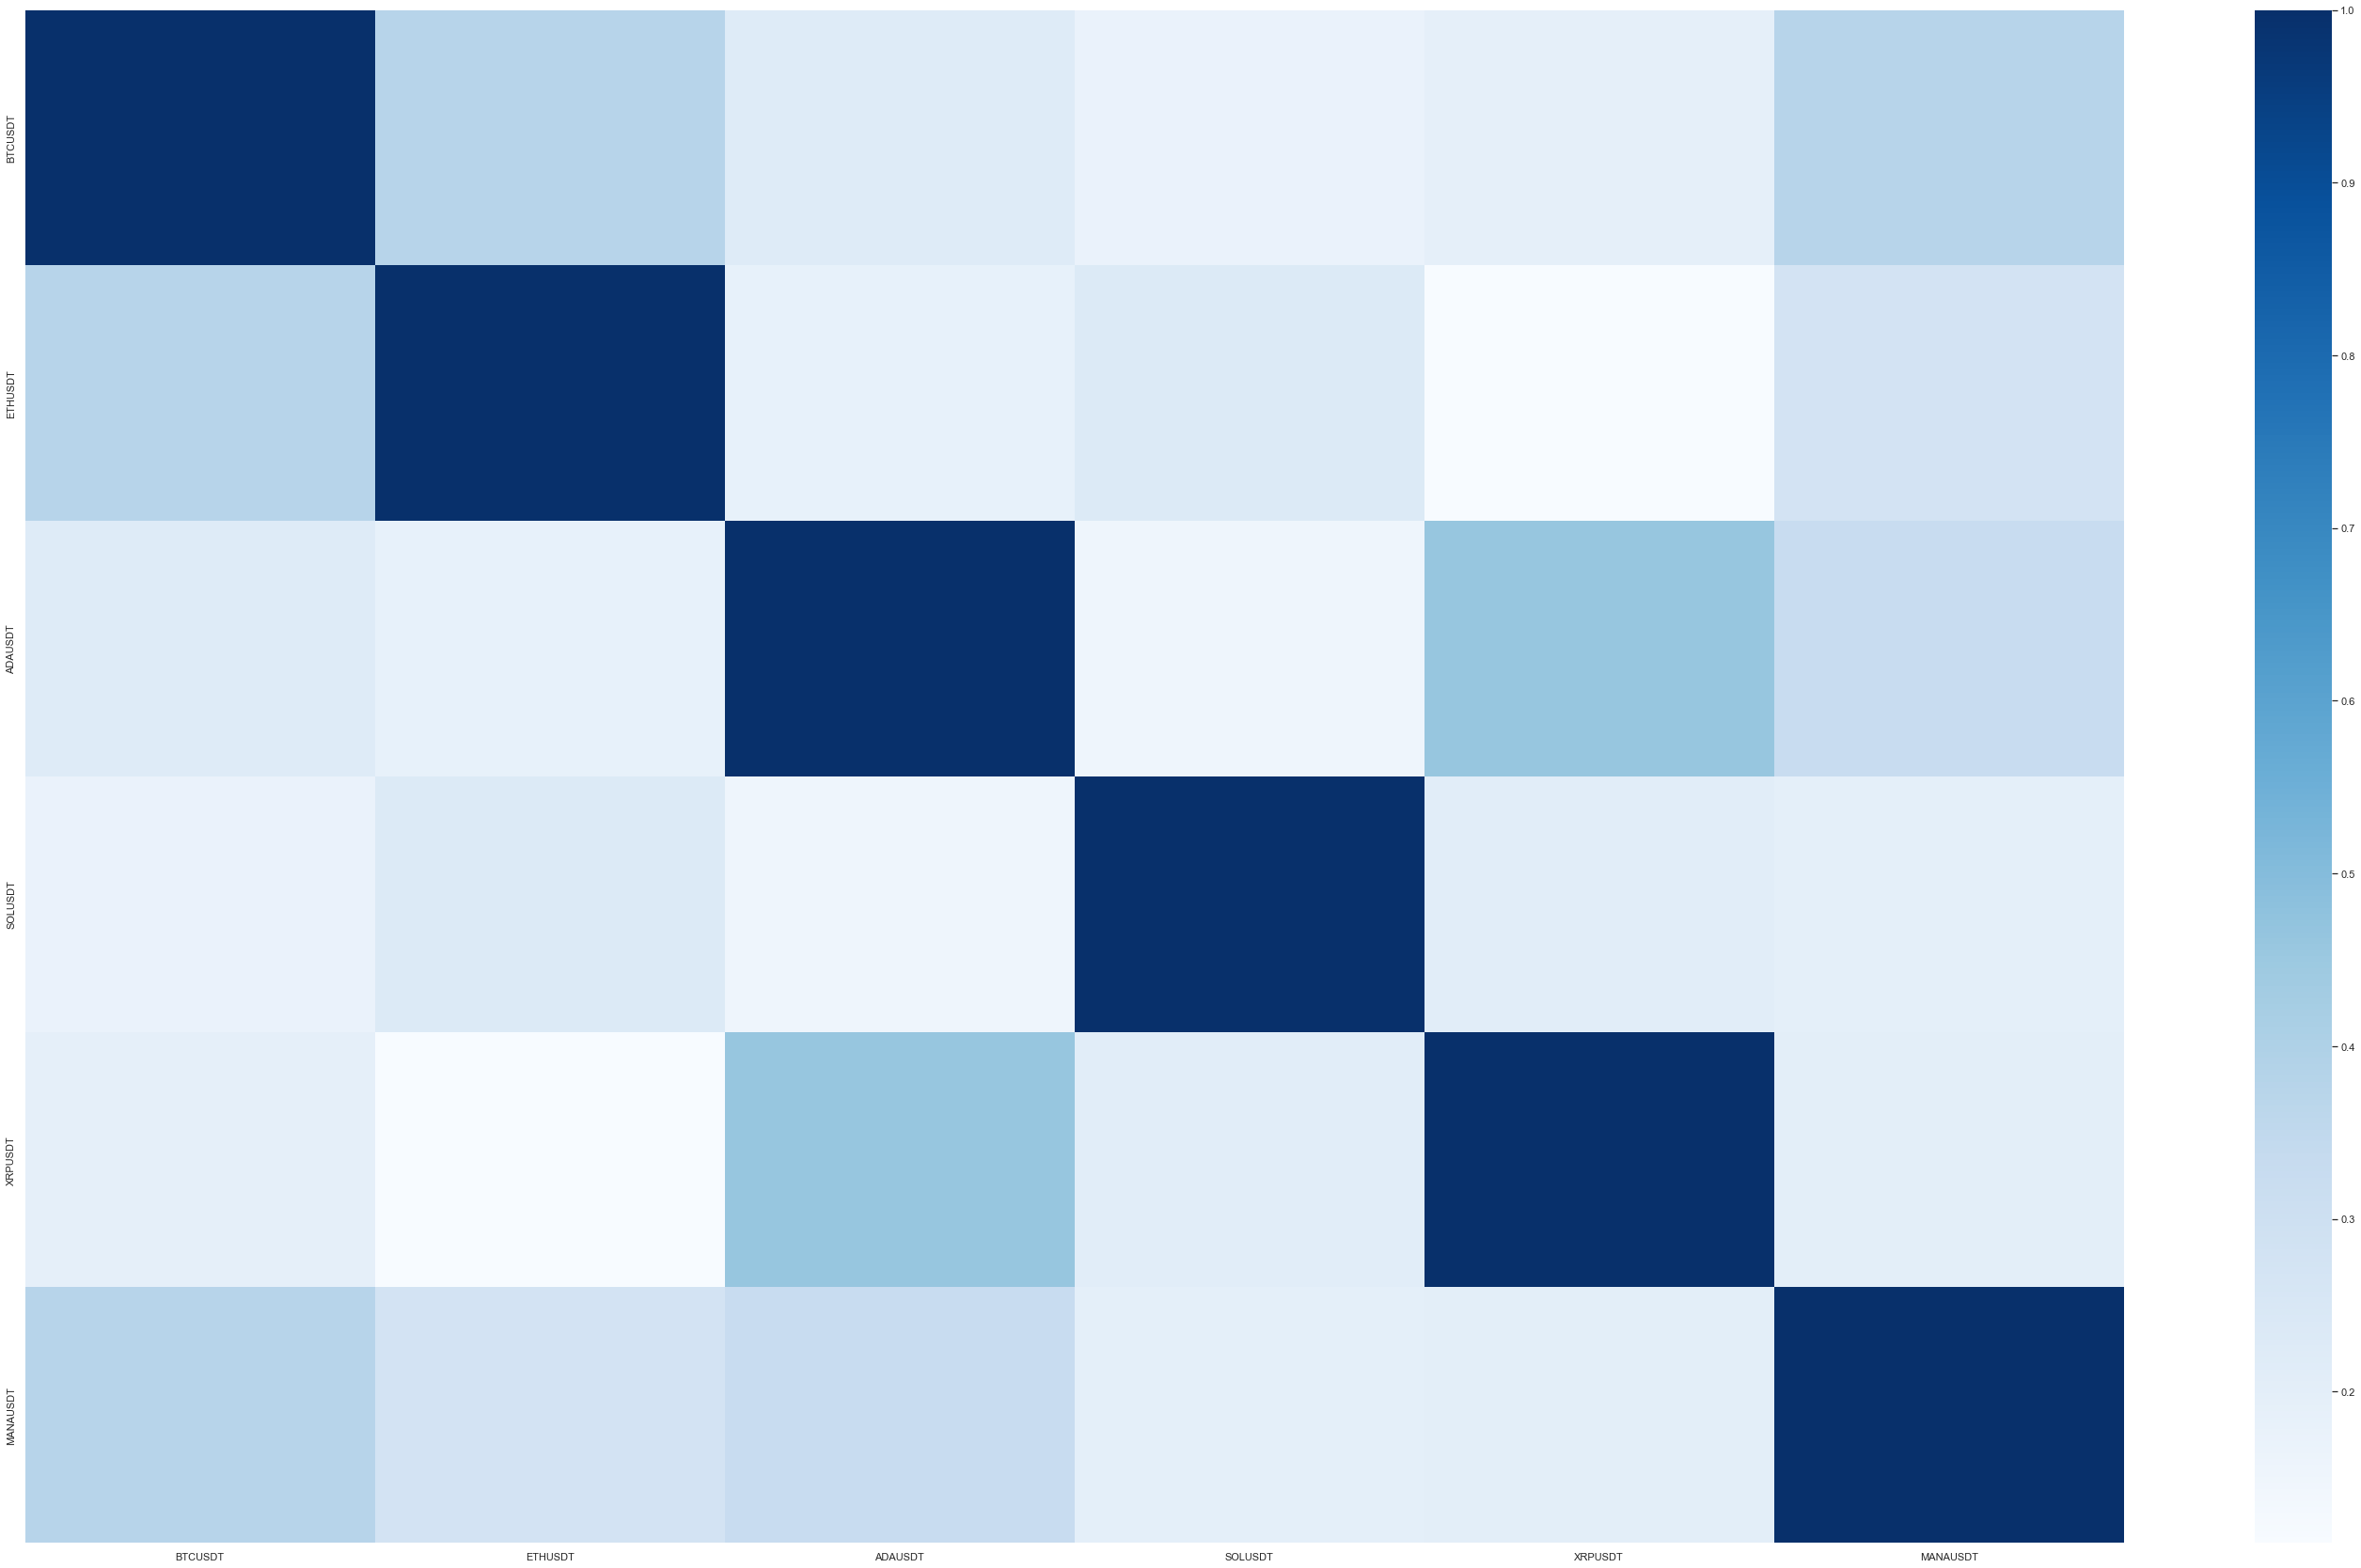

In [59]:
sns.heatmap(corr1, cmap = 'Blues')

In [60]:
corr_df = logret_df.corr()

In [64]:
#positive corr to BTC
corr_df['BTCUSDT'].nlargest(10)

BTCDOWNUSDT    1.000000
BTCUSDT        1.000000
XZCUSDT        1.000000
SPELLUSDT      0.936799
BTCUPUSDT      0.932501
HIGHUSDT       0.818632
PEOPLEUSDT     0.731275
MCUSDT         0.675783
FXSUSDT        0.672063
IMXUSDT        0.653801
Name: BTCUSDT, dtype: float64

In [63]:
#negative corr to BTC
corr_df['BTCUSDT'].nsmallest(10)

USTUSDT       -0.626393
UNIDOWNUSDT   -0.484353
LTCDOWNUSDT   -0.447237
FLUXUSDT      -0.264579
POWRUSDT      -0.164891
DOTDOWNUSDT   -0.154877
FORUSDT       -0.148553
PAXUSDT       -0.143584
VOXELUSDT     -0.131431
ANYUSDT       -0.123092
Name: BTCUSDT, dtype: float64

In [65]:
exclude = ['UP', 'DOWN', 'BEAR' 'BULL']

In [66]:
non_lev = [x for x in relevant if all(excludes not in x for excludes in exclude)]
non_lev

['BTCUSDT',
 'ETHUSDT',
 'BNBUSDT',
 'BCCUSDT',
 'NEOUSDT',
 'LTCUSDT',
 'QTUMUSDT',
 'ADAUSDT',
 'XRPUSDT',
 'EOSUSDT',
 'TUSDUSDT',
 'IOTAUSDT',
 'XLMUSDT',
 'ONTUSDT',
 'TRXUSDT',
 'ETCUSDT',
 'ICXUSDT',
 'VENUSDT',
 'NULSUSDT',
 'VETUSDT',
 'PAXUSDT',
 'BCHABCUSDT',
 'BCHSVUSDT',
 'USDCUSDT',
 'LINKUSDT',
 'WAVESUSDT',
 'BTTUSDT',
 'USDSUSDT',
 'ONGUSDT',
 'HOTUSDT',
 'ZILUSDT',
 'ZRXUSDT',
 'FETUSDT',
 'BATUSDT',
 'XMRUSDT',
 'ZECUSDT',
 'IOSTUSDT',
 'CELRUSDT',
 'DASHUSDT',
 'NANOUSDT',
 'OMGUSDT',
 'THETAUSDT',
 'ENJUSDT',
 'MITHUSDT',
 'MATICUSDT',
 'ATOMUSDT',
 'TFUELUSDT',
 'ONEUSDT',
 'FTMUSDT',
 'ALGOUSDT',
 'USDSBUSDT',
 'GTOUSDT',
 'ERDUSDT',
 'DOGEUSDT',
 'DUSKUSDT',
 'ANKRUSDT',
 'WINUSDT',
 'COSUSDT',
 'NPXSUSDT',
 'COCOSUSDT',
 'MTLUSDT',
 'TOMOUSDT',
 'PERLUSDT',
 'DENTUSDT',
 'MFTUSDT',
 'KEYUSDT',
 'STORMUSDT',
 'DOCKUSDT',
 'WANUSDT',
 'FUNUSDT',
 'CVCUSDT',
 'CHZUSDT',
 'BANDUSDT',
 'BUSDUSDT',
 'BEAMUSDT',
 'XTZUSDT',
 'RENUSDT',
 'RVNUSDT',
 'HCUSDT',
 'HBARUSD

In [69]:
stacked = corr_df.filter(non_lev, axis = 1).filter(non_lev, axis = 0)
stacked

,BTCUSDT,ETHUSDT,BNBUSDT,NEOUSDT,LTCUSDT,QTUMUSDT,ADAUSDT,XRPUSDT,EOSUSDT,TUSDUSDT,...,HIGHUSDT,CVXUSDT,PEOPLEUSDT,OOKIUSDT,SPELLUSDT,USTUSDT,JOEUSDT,ACHUSDT,IMXUSDT,GLMRUSDT
BTCUSDT,1.000000,0.377352,0.304715,0.410833,0.460203,0.251438,0.224349,0.195385,0.310629,0.038203,...,0.818632,0.436039,0.731275,-0.003244,0.936799,-0.626393,0.488350,NaN,0.653801,NaN
ETHUSDT,0.377352,1.000000,0.363436,0.209638,0.446928,0.209365,0.183809,0.112403,0.307768,0.185833,...,-0.579263,0.360235,0.313580,-0.353960,0.295339,-0.446836,0.824699,NaN,-0.255917,NaN
BNBUSDT,0.304715,0.363436,1.000000,0.428466,0.410885,0.254046,0.422233,0.390292,0.351447,0.071119,...,-0.250423,0.393784,-0.402568,-0.578984,0.373265,-0.441690,0.656464,NaN,-0.358868,NaN
NEOUSDT,0.410833,0.209638,0.428466,1.000000,0.308751,0.531235,0.328891,0.392882,0.465775,0.060727,...,0.263363,-0.328521,0.167695,-0.571006,-0.259691,-0.696741,0.427287,NaN,0.181435,NaN
LTCUSDT,0.460203,0.446928,0.410885,0.308751,1.000000,0.186956,0.187411,0.406627,0.442780,0.005484,...,-0.123132,-0.118744,0.830333,-0.351437,-0.290514,-0.356260,-0.312604,NaN,0.653916,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USTUSDT,-0.626393,-0.446836,-0.441690,-0.696741,-0.356260,-0.084830,-0.559612,-0.113923,-0.730807,-0.326275,...,0.516530,-0.079315,-1.000000,0.137445,-0.699683,1.000000,-0.025279,NaN,-0.482063,NaN
JOEUSDT,0.488350,0.824699,0.656464,0.427287,-0.312604,-0.804411,-0.627622,0.235292,-0.132953,-1.000000,...,-1.000000,-0.202589,1.000000,-0.588239,-0.329384,-0.025279,1.000000,NaN,-0.591007,NaN
ACHUSDT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IMXUSDT,0.653801,-0.255917,-0.358868,0.181435,0.653916,0.559267,0.660978,0.999088,0.844155,-1.000000,...,NaN,0.993781,-1.000000,0.927872,0.808931,-0.482063,-0.591007,NaN,1.000000,NaN


In [72]:
unstacked = stacked.unstack()
unstacked

BTCUSDT   BTCUSDT     1.000000
          ETHUSDT     0.377352
          BNBUSDT     0.304715
          NEOUSDT     0.410833
          LTCUSDT     0.460203
                        ...   
GLMRUSDT  USTUSDT          NaN
          JOEUSDT          NaN
          ACHUSDT          NaN
          IMXUSDT          NaN
          GLMRUSDT    1.000000
Length: 99225, dtype: float64

In [80]:
#Highest correlated
unstacked[unstacked < 0.8].nlargest(20)

HIGHUSDT   OOKIUSDT     0.799299
OOKIUSDT   HIGHUSDT     0.799299
AUDIOUSDT  SPELLUSDT    0.799289
SPELLUSDT  AUDIOUSDT    0.799289
FIROUSDT   JOEUSDT      0.798889
JOEUSDT    FIROUSDT     0.798889
CVCUSDT    JOEUSDT      0.797639
JOEUSDT    CVCUSDT      0.797639
FTTUSDT    BNXUSDT      0.797520
BNXUSDT    FTTUSDT      0.797520
ZRXUSDT    CITYUSDT     0.796526
CITYUSDT   ZRXUSDT      0.796526
BICOUSDT   HIGHUSDT     0.796501
HIGHUSDT   BICOUSDT     0.796501
NPXSUSDT   LINAUSDT     0.796353
LINAUSDT   NPXSUSDT     0.796353
XZCUSDT    RUNEUSDT     0.795609
RUNEUSDT   XZCUSDT      0.795609
CTKUSDT    IMXUSDT      0.794048
IMXUSDT    CTKUSDT      0.794048
dtype: float64

In [84]:
unstacked[unstacked > -0.99].nsmallest(20)

HIGHUSDT    PEOPLEUSDT   -0.989793
PEOPLEUSDT  HIGHUSDT     -0.989793
NUUSDT      JOEUSDT      -0.987435
JOEUSDT     NUUSDT       -0.987435
BTTUSDT     XZCUSDT      -0.986553
XZCUSDT     BTTUSDT      -0.986553
CVPUSDT     IMXUSDT      -0.979366
IMXUSDT     CVPUSDT      -0.979366
BUSDUSDT    CVXUSDT      -0.974886
CVXUSDT     BUSDUSDT     -0.974886
FUNUSDT     JOEUSDT      -0.973934
JOEUSDT     FUNUSDT      -0.973934
AVAXUSDT    HIGHUSDT     -0.972773
HIGHUSDT    AVAXUSDT     -0.972773
RUNEUSDT    PEOPLEUSDT   -0.971704
PEOPLEUSDT  RUNEUSDT     -0.971704
C98USDT     IMXUSDT      -0.967693
IMXUSDT     C98USDT      -0.967693
GXSUSDT     IMXUSDT      -0.967484
IMXUSDT     GXSUSDT      -0.967484
dtype: float64